In [1]:
import numpy as np
import pandas as pd
patients = pd.read_csv("/Users/valena17/DataGripProjects/msdw2/output/explore_F6.csv", header=0)
patients["PrimaryMrn"] = patients["PrimaryMrn"].values.astype(str)

In [20]:
import numpy as np
import pandas as pd
patients1 = pd.read_csv("/Users/valena17/DataGripProjects/msdw2/output/pts_firstyr.csv")
patients1["PrimaryMrn"] = patients1["PrimaryMrn"].values.astype(str)
patients1['Year'] = patients1[' Date'].str[-4:]
# patients2 = pd.read_csv("/Users/valena17/DataGripProjects/msdw2/output/pts_visits_2022.csv", header=0)
# patients2["PrimaryMrn"] = patients2["PrimaryMrn"].values.astype(str)

In [25]:
patients1.Year.value_counts(dropna=False)

2016    3297973
2022    3229447
2018    3146432
2019    3040597
2020    2878204
         ...   
1940          1
2208          1
1920          1
1957          1
1939          1
Name: Year, Length: 127, dtype: int64

In [23]:
patients1.head()
use_this = list(patients1['Year'])

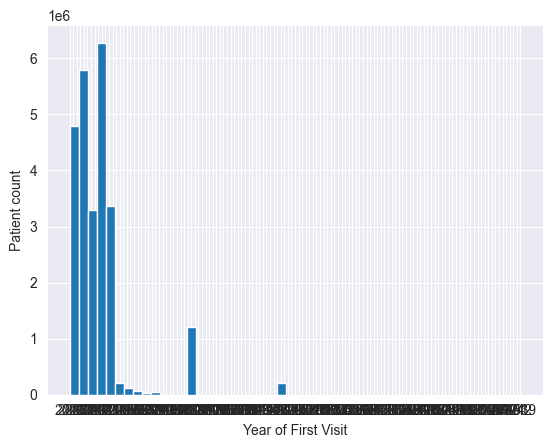

In [24]:
# AgeAtFirstVisit = AgeAtFirstVisit[AgeAtFirstVisit['AgeAtFirstVisit'] < 101]
from matplotlib import pyplot as plt
plt.hist(use_this, bins=50)
plt.xlabel("Year of First Visit")
plt.ylabel("Patient count")
plt.show()

In [2]:
patients["PrimaryMrn"].nunique()

49

In [13]:
df = patients.groupby(['PrimaryMrn'])['Value'].apply(lambda x: x[x.str.contains('F2')].count())
np.count_nonzero(df)

49

In [14]:
df = patients.groupby(['PrimaryMrn'])['Value'].apply(lambda x: x[x.str.contains('F31')].count())
np.count_nonzero(df)

9

In [15]:
df = patients.groupby(['PrimaryMrn'])['Value'].apply(lambda x: x[x.str.contains('F32|F33')].count())
np.count_nonzero(df)

14

In [16]:
df = patients.groupby(['PrimaryMrn'])['Value'].apply(lambda x: x[x.str.contains('F41')].count())
np.count_nonzero(df)

8

In [17]:
df = patients.groupby(['PrimaryMrn'])['Value'].apply(lambda x: x[x.str.contains('F43')].count())
np.count_nonzero(df)

8

In [26]:
lauren = pd.read_csv("/Users/valena17/DataGripProjects/msdw2/output/postalcode_insurance_Lauren.csv", header=0)
lauren["PrimaryMrn"] = lauren["PrimaryMrn"].values.astype(str)
lauren = lauren.replace(['Unknown', '*Unknown','*Unspecified', 'Choose not to disclose', 'Not recorded on birth certificate','*Not Applicable', 'Indeterminate', 'Uncertain', 'UNKNOWN', 'PATIENT DECLINED', '*Deleted'], np.nan)

In [27]:
from re import search
def insurance_names(row): # WTC,
    if search('dicare|dicaid|WTC|Child', str(row)):
        return 'Public'
    if search('Self', str(row)):
        return 'Self-pay'
    if pd.isna(row):
        return 'NaN'
    else:
        return 'Private'

lauren['insurance_status'] = lauren['PayorFinancialClass'].apply(insurance_names)

In [28]:
lauren.PostalCode = lauren.PostalCode.str[:5]
lauren.PostalCode = lauren.PostalCode.replace(['99999', '00000'],np.nan)
lauren.PostalCode.value_counts(dropna=False)

10029    23563
10025     8447
10035     6791
10128     6534
10009     4833
         ...  
70116        1
13135        1
11439        1
17339        1
19006        1
Name: PostalCode, Length: 3031, dtype: int64

In [29]:
income = pd.read_csv('/Users/valena17/psych_nlp/data/zipcode_income.csv')
income = income.replace(['-'],np.nan)
income.PostalCode = income.PostalCode.str[-5:]

print(income['2021_Median_Hincome'].isna().sum())

income['2021_Median_Hincome'] = income['2021_Median_Hincome'].replace(['250,000+'],'250000')
income['2021_Median_Hincome'] = income['2021_Median_Hincome'].replace(['2,500-'],'2500')
income['2021_Median_Hincome']=income['2021_Median_Hincome'].values.astype(float)

189


In [30]:
controls_clean = pd.merge(lauren,income, on=['PostalCode'], how='left')
controls_clean

,PrimaryMrn,PostalCode,PayorFinancialClass,insurance_status,2021_Median_Hincome,2020_Median_Hincome,2019_Median_Hincome
0,1000417,10039,Medicaid Managed Care,Public,50164.0,41363,42278
1,1000490,10458,Self-Pay,Self-pay,38768.0,37886,35423
2,1001230,10009,Medicaid MS,Public,77551.0,68220,63717
3,1001230,10009,Commercial,Private,77551.0,68220,63717
4,1001230,10009,Medicaid MS,Public,77551.0,68220,63717
...,...,...,...,...,...,...,...
238856,F193455,11102,Self-Pay,Self-pay,95478.0,75772,67751
238857,F206752,10069,Self-Pay,Self-pay,183178.0,130556,132500
238858,F220736,10013,Commercial/Managed Care,Private,137572.0,130675,113191
238859,F223040,10028,Commercial/Managed Care,Private,149789.0,131013,122969


In [31]:
controls_clean['2021_Median_Hincome'] = controls_clean['2021_Median_Hincome'].replace(['250,000+'],'250000')
controls_clean['2021_Median_Hincome']=controls_clean['2021_Median_Hincome'].values.astype(float)
def income_range(x):
    income = x['2021_Median_Hincome']
    if income < 52000:
        return '<52,000'
    if 52000 <= income <= 65999:
        return '52,000 - 65,999'
    if 66000 <= income <= 87999:
        return '66,000 - 87,999'
    if 88000 <= income :
        return '88,000+'

controls_clean['2021_income_quartile'] = controls_clean.apply(lambda row: income_range(row), axis=1)
controls_clean

,PrimaryMrn,PostalCode,PayorFinancialClass,insurance_status,2021_Median_Hincome,2020_Median_Hincome,2019_Median_Hincome,2021_income_quartile
0,1000417,10039,Medicaid Managed Care,Public,50164.0,41363,42278,"<52,000"
1,1000490,10458,Self-Pay,Self-pay,38768.0,37886,35423,"<52,000"
2,1001230,10009,Medicaid MS,Public,77551.0,68220,63717,"66,000 - 87,999"
3,1001230,10009,Commercial,Private,77551.0,68220,63717,"66,000 - 87,999"
4,1001230,10009,Medicaid MS,Public,77551.0,68220,63717,"66,000 - 87,999"
...,...,...,...,...,...,...,...,...
238856,F193455,11102,Self-Pay,Self-pay,95478.0,75772,67751,"88,000+"
238857,F206752,10069,Self-Pay,Self-pay,183178.0,130556,132500,"88,000+"
238858,F220736,10013,Commercial/Managed Care,Private,137572.0,130675,113191,"88,000+"
238859,F223040,10028,Commercial/Managed Care,Private,149789.0,131013,122969,"88,000+"


In [32]:
pd.DataFrame.to_csv(controls_clean, "/Users/valena17/psych_nlp/data/lauren_zipcode_income_insurance_Biome.csv",index = False)

In [29]:
scz_con = pd.read_csv("/Users/valena17/psych_nlp/data/blackwhite_malefemale_beforesczANDcontrols.csv")
scz_con["PrimaryMrn"]=scz_con["PrimaryMrn"].values.astype(str)
scz_patients_comorbidities = pd.read_csv('/Users/valena17/psych_nlp/data/clean_ccsr_scz_patients.csv')
scz_patients_comorbidities["PrimaryMrn"]=scz_patients_comorbidities["PrimaryMrn"].values.astype(str)
control_patients = pd.read_csv('/Users/valena17/psych_nlp/data/all_sample_controls.csv')
control_patients["PrimaryMrn"]=control_patients["PrimaryMrn"].values.astype(str)

/var/folders/xm/m4dy5bvs1fn7fb9wxjhsg4dc0000gn/T/ipykernel_21579/854022310.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  scz_con = pd.read_csv("/Users/valena17/psych_nlp/data/blackwhite_malefemale_beforesczANDcontrols.csv")
/var/folders/xm/m4dy5bvs1fn7fb9wxjhsg4dc0000gn/T/ipykernel_21579/854022310.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  scz_patients_comorbidities = pd.read_csv('/Users/valena17/psych_nlp/data/clean_ccsr_scz_patients.csv')
/var/folders/xm/m4dy5bvs1fn7fb9wxjhsg4dc0000gn/T/ipykernel_21579/854022310.py:5: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  control_patients = pd.read_csv('/Users/valena17/psych_nlp/data/all_sample_controls.csv')


In [20]:
scz_con

,PrimaryMrn,Gender,Race_Ethnicity,insurance_status,m_income,Anx,Bpd,Dep,Scz,Substance,Trauma_stress,Age
0,1003377,Female,Black or African-American,NaN,66923.0,0.0,1.0,1.0,1.0,0.0,0.0,55.0
1,1003711,Female,Black or African-American,NaN,33945.0,0.0,0.0,0.0,1.0,0.0,0.0,41.0
2,1009219,Female,Black or African-American,NaN,33901.0,0.0,1.0,1.0,1.0,0.0,0.0,41.0
3,1010078,Male,Black or African-American,NaN,65038.0,0.0,0.0,0.0,1.0,0.0,1.0,41.0
4,1010656,Female,Black or African-American,NaN,152335.0,0.0,0.0,1.0,1.0,0.0,0.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...
174880,X400170,Female,White,Self-pay,NaN,0.0,0.0,0.0,0.0,1.0,0.0,23.0
174881,X400195,Female,White,Self-pay,NaN,0.0,0.0,0.0,0.0,1.0,0.0,24.0
174882,X400200,Male,Black or African-American,Self-pay,105538.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0
174883,X400205,Female,Black or African-American,Self-pay,105538.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0


In [26]:
scz_trauma_sub_mrns = scz_con.loc[(scz_con['Scz'] == 1) & (scz_con['Trauma_stress'] == 1) & (scz_con['Substance'] == 1)]
con_trauma_sub_mrns = scz_con.loc[(scz_con['Scz'] == 0) & (scz_con['Trauma_stress'] == 1) & (scz_con['Substance'] == 1)]

,PrimaryMrn,Gender,Race_Ethnicity,insurance_status,m_income,Anx,Bpd,Dep,Scz,Substance,Trauma_stress,Age
14,1024354,Male,Black or African-American,Public,105538.0,0.0,0.0,0.0,1.0,1.0,1.0,42.0
15,1024362,Male,Black or African-American,Public,101409.0,0.0,0.0,0.0,1.0,1.0,1.0,48.0
21,1030302,Male,White,Public,73562.0,0.0,0.0,0.0,1.0,1.0,1.0,53.0
81,1093579,Female,Black or African-American,NaN,33901.0,0.0,0.0,1.0,1.0,1.0,1.0,52.0
95,1116621,Female,White,NaN,139343.0,0.0,0.0,0.0,1.0,1.0,1.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11577,F584495,Male,Black or African-American,Public,137533.0,0.0,0.0,0.0,1.0,1.0,1.0,41.0
11602,F597662,Male,Black or African-American,Public,137533.0,0.0,0.0,0.0,1.0,1.0,1.0,50.0
11616,F605263,Male,Black or African-American,Public,103440.0,0.0,0.0,0.0,1.0,1.0,1.0,43.0
34955,2680252,Female,White,NaN,136559.0,1.0,0.0,1.0,1.0,1.0,1.0,31.0


In [30]:
scz_patients_comorbidities[scz_patients_comorbidities['PrimaryMrn'].isin(list(scz_trauma_sub_mrns['PrimaryMrn']))]['DisplayString'].value_counts()

Adjustment disorder with disturbance of conduct                                  96
Unspecified psychosis not due to a substance or known physiological condition    78
Other psychoactive substance abuse, uncomplicated                                65
Schizoaffective disorder, unspecified                                            65
Unspecified mood (affective) disorder                                            54
                                                                                 ..
Bipolar disorder, in partial remission, most recent episode depressed             1
Other specified nonpsychotic mental disorders                                     1
Mixed receptive-expressive language disorder                                      1
Sedative, hypnotic or anxiolytic dependence with withdrawal, uncomplicated        1
Cannabis abuse with psychotic disorder with delusions                             1
Name: DisplayString, Length: 203, dtype: int64

In [31]:
control_patients[control_patients['PrimaryMrn'].isin(list(con_trauma_sub_mrns['PrimaryMrn']))]['DisplayString'].value_counts()

Post-traumatic stress disorder, unspecified                                                  673
Adjustment disorder with disturbance of conduct                                              658
Nicotine dependence, unspecified, uncomplicated                                              577
Adjustment disorder with depressed mood                                                      559
Adjustment disorder, unspecified                                                             516
                                                                                            ... 
Alcohol dependence with withdrawal with perceptual disturbance                                 1
Male orgasmic disorder                                                                         1
Other situational type phobia                                                                  1
Other psychoactive substance dependence with psychoactive substance-induced mood disorder      1
Cocaine use, unspecified with 

In [76]:
from matplotlib import pyplot as plt

def something(df):
    sub_dates = list(df[df['CCSR_wSubstance'] == 'Substance-related disorders'].VisitDate)
    trauma_dates = list(df[df['CCSR_wSubstance'] == 'Trauma- and stressor-related disorders'].VisitDate)
    LOS = []

    for i, value in enumerate(sub_dates):
        a = pd.to_datetime(value, format="%Y-%m-%d")
        b = pd.to_datetime(trauma_dates[i], format="%Y-%m-%d")
        c = (b-a).days / 365
        # if c > 2000 :
        #     print(a, b)
        LOS.append(c)
    print("Mean years between diagnoses = {0} (sd = {1})".format(np.mean(LOS), np.std(LOS)))
    print("Median years between diagnoses = {0} [{1},{2}])".format(np.median(LOS), np.max(LOS), np.min(LOS)))
    t_first = len(list(filter(lambda x: (x > 0), LOS))) / len(LOS)
    s_first = len(list(filter(lambda x: (x < 0), LOS))) / len(LOS)
    print("% of pts diagnosed with trauma first: {0}, sub first: {1})".format(t_first, s_first))
    # PAT_ENC_CSN_ID # 80658520 --> messed up year on their record --> LOS = 6 years
    plt.hist(LOS, bins=50)
    plt.xlabel("years between diagnoses")
    plt.ylabel("count")
    plt.show()

for people W/O SCZ: 

Mean years between diagnoses = 0.46621416785326886 (sd = 3.1439699546936746)
Median years between diagnoses = 0.08767123287671233 [13.8,-12.901369863013699])
% of pts diagnosed with trauma first: 0.5628062935259222, sub first: 0.4116584988393087)


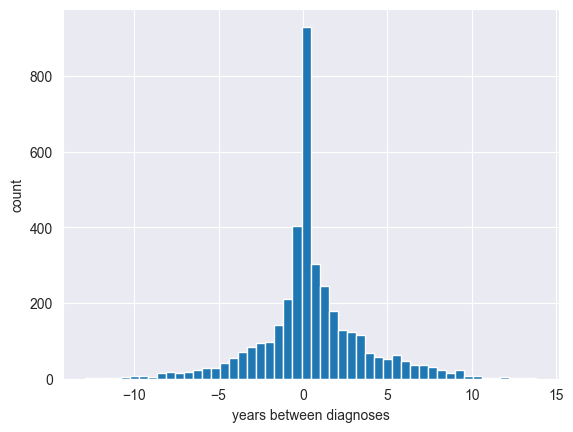

for black males W/O SCZ: 

Mean years between diagnoses = 0.7642850257585657 (sd = 2.921164778634747)
Median years between diagnoses = 0.15616438356164383 [13.8,-12.901369863013699])
% of pts diagnosed with trauma first: 0.6035965598123534, sub first: 0.36512900703674744)


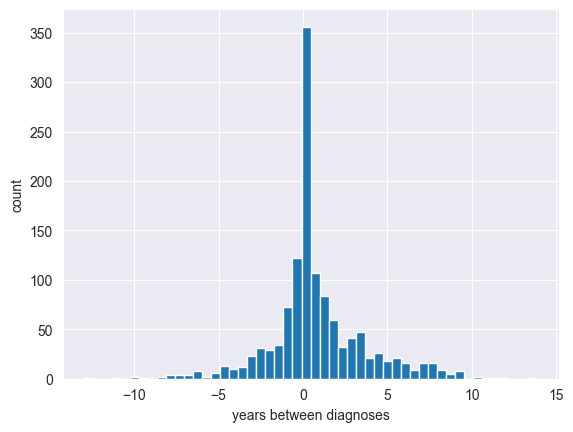

for black females W/O SCZ: 

Mean years between diagnoses = 0.2006970327702212 (sd = 3.4309595223448914)
Median years between diagnoses = 0.049315068493150684 [12.580821917808219,-11.846575342465753])
% of pts diagnosed with trauma first: 0.5371024734982333, sub first: 0.44758539458186103)


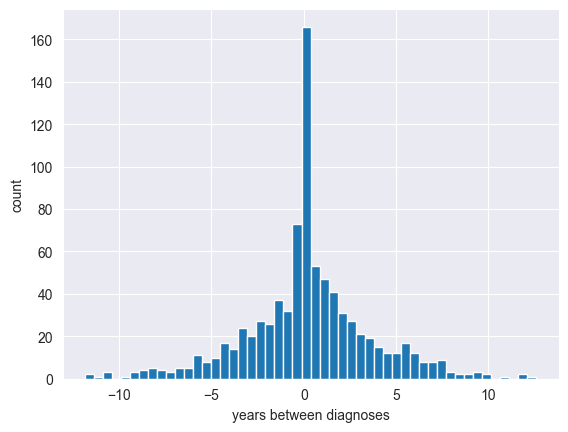

for white males W/O SCZ: 

Mean years between diagnoses = 0.4835261424706501 (sd = 3.0994778092675928)
Median years between diagnoses = 0.06027397260273973 [12.441095890410958,-11.98082191780822])
% of pts diagnosed with trauma first: 0.5531724754244861, sub first: 0.42091152815013405)


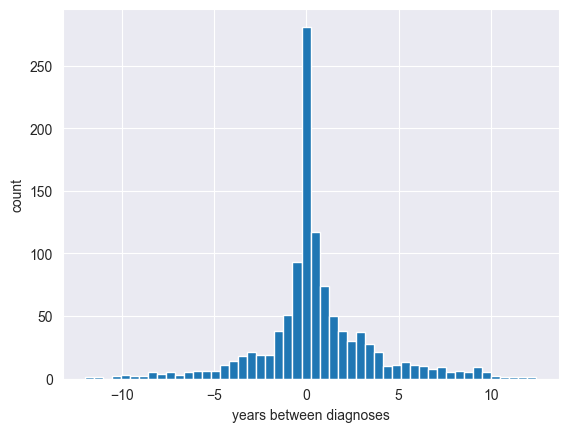

for white females W/O SCZ: 

Mean years between diagnoses = 0.18814959773863885 (sd = 3.1976999695491735)
Median years between diagnoses = 0.03972602739726028 [13.383561643835616,-12.117808219178082])
% of pts diagnosed with trauma first: 0.5317460317460317, sub first: 0.44126984126984126)


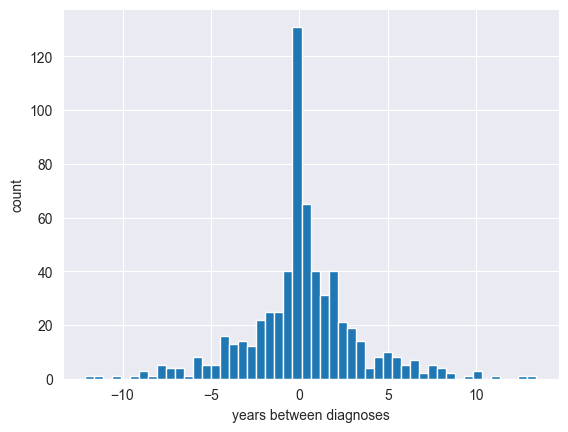


 
 for people w SCZ: 

Mean years between diagnoses = 0.8474210456767828 (sd = 2.428136294757984)
Median years between diagnoses = 0.27123287671232876 [10.791780821917808,-8.745205479452055])
% of pts diagnosed with trauma first: 0.662379421221865, sub first: 0.3183279742765273)


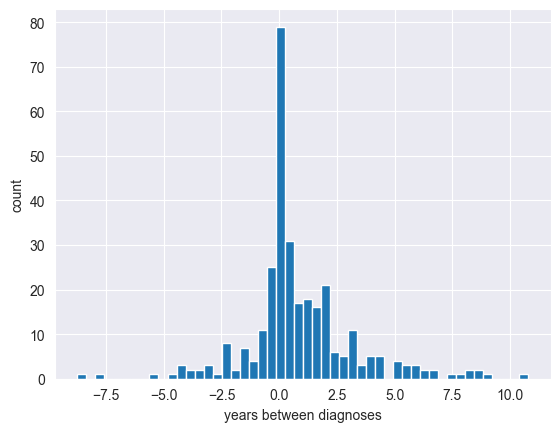

for black males w SCZ: 

Mean years between diagnoses = 0.9768204758471521 (sd = 2.4035467656371465)
Median years between diagnoses = 0.25068493150684934 [10.791780821917808,-4.432876712328767])
% of pts diagnosed with trauma first: 0.6578947368421053, sub first: 0.3092105263157895)


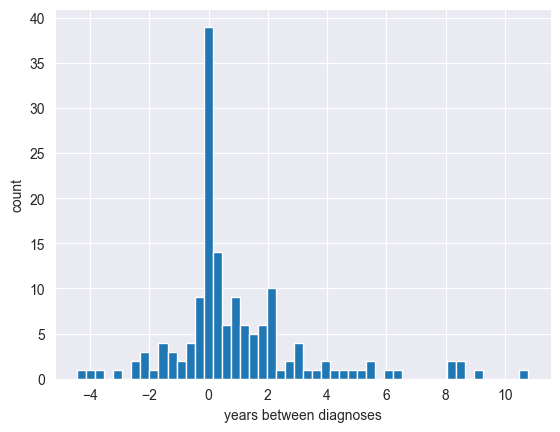

for black females w SCZ: 

Mean years between diagnoses = 0.7904109589041097 (sd = 3.049938681917461)
Median years between diagnoses = 0.6821917808219178 [7.8191780821917805,-8.745205479452055])
% of pts diagnosed with trauma first: 0.6296296296296297, sub first: 0.37037037037037035)


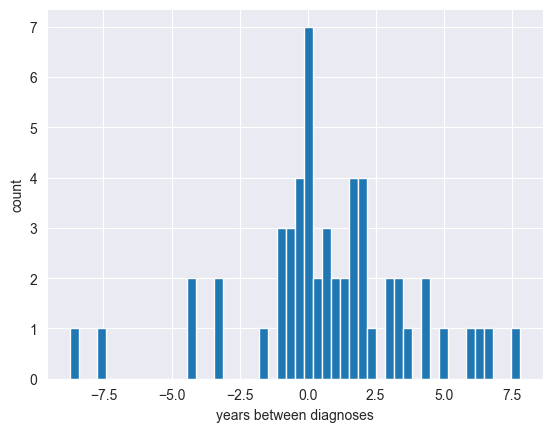

for white males w SCZ: 

Mean years between diagnoses = 0.7980894015861572 (sd = 2.1286692281991613)
Median years between diagnoses = 0.36164383561643837 [6.550684931506849,-5.449315068493151])
% of pts diagnosed with trauma first: 0.7368421052631579, sub first: 0.25)


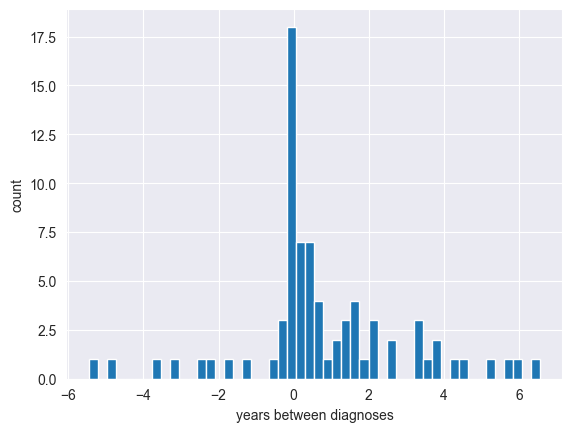

for white females w SCZ: 

Mean years between diagnoses = 0.4046291922531885 (sd = 1.8589808950261713)
Median years between diagnoses = 0.12876712328767123 [7.504109589041096,-2.4465753424657533])
% of pts diagnosed with trauma first: 0.5517241379310345, sub first: 0.4482758620689655)


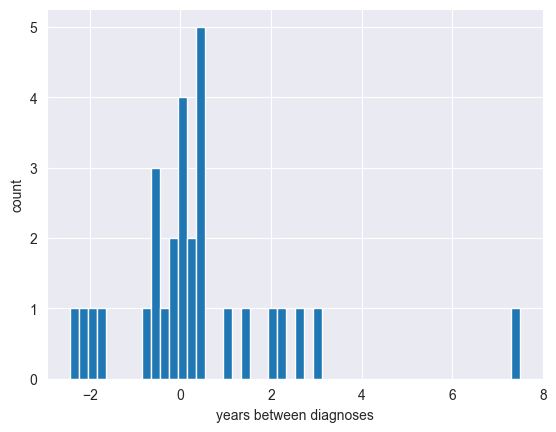

In [77]:
con_trauma_sub = control_patients[control_patients['PrimaryMrn'].isin(list(con_trauma_sub_mrns['PrimaryMrn']))]
con_trauma_sub = con_trauma_sub[con_trauma_sub['CCSR_wSubstance'].isin(['Substance-related disorders', 'Trauma- and stressor-related disorders'])].drop_duplicates(subset = ['PrimaryMrn', 'CCSR_wSubstance'], keep="first")
print('for people W/O SCZ: \n')
something(con_trauma_sub)
print('for black males W/O SCZ: \n')
something(con_trauma_sub.loc[(con_trauma_sub['Race_2'] == 'Black or African-American') & (con_trauma_sub['Merged_Gender'] == 'Male')])
print('for black females W/O SCZ: \n')
something(con_trauma_sub.loc[(con_trauma_sub['Race_2'] == 'Black or African-American') & (con_trauma_sub['Merged_Gender'] == 'Female')])
print('for white males W/O SCZ: \n')
something(con_trauma_sub.loc[(con_trauma_sub['Race_2'] == 'White') & (con_trauma_sub['Merged_Gender'] == 'Male')])
print('for white females W/O SCZ: \n')
something(con_trauma_sub.loc[(con_trauma_sub['Race_2'] == 'White') & (con_trauma_sub['Merged_Gender'] == 'Female')])


scz_trauma_sub = scz_patients_comorbidities[scz_patients_comorbidities['PrimaryMrn'].isin(list(scz_trauma_sub_mrns['PrimaryMrn']))]
scz_trauma_sub = scz_trauma_sub[scz_trauma_sub['CCSR_wSubstance'].isin(['Substance-related disorders', 'Trauma- and stressor-related disorders'])].drop_duplicates(subset = ['PrimaryMrn', 'CCSR_wSubstance'], keep="first")
print('\n \n for people w SCZ: \n')
something(scz_trauma_sub)
print('for black males w SCZ: \n')
something(scz_trauma_sub.loc[(scz_trauma_sub['Race_2'] == 'Black or African-American') & (scz_trauma_sub['Merged_Gender'] == 'Male')])
print('for black females w SCZ: \n')
something(scz_trauma_sub.loc[(scz_trauma_sub['Race_2'] == 'Black or African-American') & (scz_trauma_sub['Merged_Gender'] == 'Female')])
print('for white males w SCZ: \n')
something(scz_trauma_sub.loc[(scz_trauma_sub['Race_2'] == 'White') & (scz_trauma_sub['Merged_Gender'] == 'Male')])
print('for white females w SCZ: \n')
something(scz_trauma_sub.loc[(scz_trauma_sub['Race_2'] == 'White') & (scz_trauma_sub['Merged_Gender'] == 'Female')])

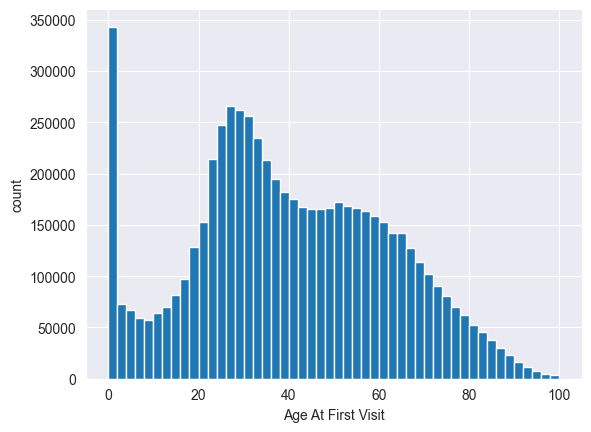

In [81]:
AgeAtFirstVisit = pd.read_csv("/Users/valena17/DataGripProjects/msdw2/output/all_patients_AgeAtFirstVisit.csv")
AgeAtFirstVisit["PrimaryMrn"]=AgeAtFirstVisit["PrimaryMrn"].values.astype(str)
AgeAtFirstVisit = AgeAtFirstVisit[AgeAtFirstVisit['AgeAtFirstVisit'] < 101]
plt.hist(list(AgeAtFirstVisit['AgeAtFirstVisit']), bins=50)
plt.xlabel("Age At First Visit")
plt.ylabel("count")
plt.show()

In [1]:
import pandas as pd
delusional = pd.read_csv('/Users/valena17/psych_nlp/data/clean_ccsr_ONLYscz_patients.csv')
delusional = delusional[delusional['Value'] == 'F22']
delusional["PrimaryMrn"]=delusional["PrimaryMrn"].values.astype(str)
delusional['Race_2'].value_counts()

White                                        416
Black or African-American                    363
Other Race                                   340
Asian                                         47
Hispanic or Latino                            20
Mixed racial group                            15
Native Hawaiian or Other Pacific Islander      9
American Indian or Alaska Native               5
Name: Race_2, dtype: int64